# Non-linear Regression in Python.


In [1]:
# Import libraries needed:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from scipy.optimize import curve_fit
%matplotlib inline

# Set global font size for plots:
mpl.rcParams['font.size'] = 14
# (see https://matplotlib.org/tutorials/introductory/customizing.html).

## 1. Fit to a Gaussian function:

A fit to a Gaussian function is a good example of non-linear least-squares regression, where the function is **non-linear in the fit parameters**.

In general, a **Gaussian function** can be written as: 

$$f(x) = A + B \exp \left[- \frac{\left(x-x_0 \right)^2}{2 \sigma^2} \right],$$

where $x$ is the independent variable, $x_0$ is the mean and $\sigma$ is the standard deviation. $A$ is the background level (offset) and $B$ is the amplitude and typically also the normalisation factor when referring to probability distributions.

As we can see, when fitting this function, we will have to find the fit parameters $A$, $B$, $x_0$ and $\sigma$. It is important to notice that $f(x)$ is **not linear** in parameters $x_0$ and $\sigma$, as these are found inside the exponential. Hence, we will need to use  a non-linear regression method based on iterative minimisation algorithms to find the fit parameters that minimise the sum of squares of residuals.

To do this, we will use the function **scipy.optimize.curve_fit** for **non-linear least-squares fittting** of a function to data. The documentation for this function can be found here:
https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html

Note that one can also use scipy.stats.norm.fit(data) to fit to a normal/Gaussian distribution to data. You will see this in the Python sessions in term 2.

In [2]:
## Generate data that follows a Gaussian function, to fit it. Data with random noise and with a background level.
#x = np.arange(0,10,0.5)                  # x values  
#def f_G0(x, A, B, x0, std):                 # define Gaussian function
#    return A + B * np.exp(-(x-x0)**2/(2*std**2))
#y0 = f_G0(x,0.5,2, 5, 3)                    # y values, Gaussian, before noise is added.
#plt.plot(x, y0, '-')                        # plot underlying equation.                     
#s = 0.5*(np.random.rand(len(x))-0.5)/0.5    # generate random noise between around 0 of amplitude 0.5 using uniform distribution [0,1).                                 # background level 
#y = y0 + s                                  # add random noise to original y0 values, and add background level.
#plt.plot(x, y, 'ro')
#y

The (x,y) data we want to fit is:

In [3]:
# Data with points every 1 unit of x, 0.5 amplitude uniform noise and not much wings:
x = np.arange(-5,16,1) 
y = np.array([0.23621606, 0.59418508, 0.79955783, 0.71083723, 0.69087766,
       1.40088692, 0.85544098, 1.48946305, 2.32917501, 2.43508833,
       2.90500256, 2.21953157, 2.52013209, 2.16830119, 0.93025562,
       1.13608838, 0.92611801, 0.16294837, 0.73317205, 0.84852678,
       0.79370533])

Here is a plot of the data:

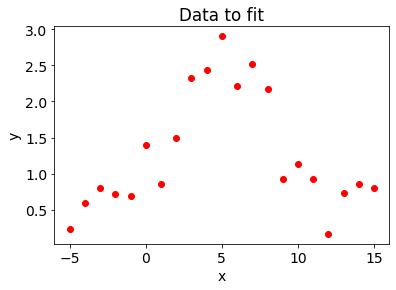

In [4]:
plt.plot(x, y, 'ro')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Data to fit');
plt.savefig('Gaussian_data1.eps', format='eps')   # save figure to current folder (place before plt.show()).
plt.savefig('Gaussian_data1.png', format='png') 

The sintaxis for the **scipy.optimize.curve_fit** function is the following: 

-To fit with no weights:

    curve_fit(func, x, y, param_guesses)

-To fit with weights:

    curve_fit(fun, x, y, param_guesses, sigma=err, absolute_sigma=True)

Here, "fun" is the function to fit, "x" and "y" are the arrays of x and y data values, "param_guesses" is an array containing a guess value for each fit parameter, and "err" is a one-dimensional array containing the uncertainties (standard deviations) in the y values of the data. Entering absolute_sigma=True ensures that sigma values are used in an absolute way and that the covariance matrix that is returned is not scaled.

The function applies weighted least-squares estimation and minimises the corresponding $\chi^2$ function, i.e., the weighted sum or residuals (or, equivalently, the sum or squares of normalised residuals), $\chi^2 = \sum_i(y_i - func(x_i) / err_i) ^2)$. 


The function to fit, "fun", must take the independent variable as the first argument and the fit parameters as separate remaining arguments (refer to https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html). 

Let's define a Gaussian function in that way:

In [5]:
def f_G(x, A, B, x0, std):
    '''Gaussian function with offset A, amplitude B, mean x0 and standard deviation std.'''
    return A + B*np.exp(-(x-x0)**2/(2*std**2))

Knowing the meaning of the fit parameters as described above, and looking at the plot of the data, it is reasonably easy to provide initial guesses for the fit parameters as follows:

In [6]:
# Initial guesses for fit parameters:
param_guesses = [0.8, 2, 5, 4]      

In [7]:
popt, pcov = curve_fit(f_G, x, y, param_guesses) # fit function
# Outputs of curve_fit are fit parameters (popt) and covariance matrix (pcov).
# The fit parameters are in the same order as in the function to fit.

# The diagonal elements of the covariance matrix are the variance estimates for each fit parameter.
# Hence, to obtain the uncertainties of the fit parameters, we get the diagonal elements
# of the covariance matrix and take the square root:
err = np.sqrt(np.diag(pcov))

# Print fit parameters with their errors (to 2 decimal places):
param_names = ["A", "B", "x0", "std"]
[print(param_names[i]," = {0:0.2f} \xb1 {1:0.2f}".format(popt[i],err[i])) for i in range(len(popt))];
# The previous command uses "list comprehension" in Python.

A  = 0.62 ± 0.11
B  = 2.12 ± 0.19
x0  = 5.21 ± 0.25
std  = 2.63 ± 0.32


Plot an overlay of the data points and the resulting fit:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


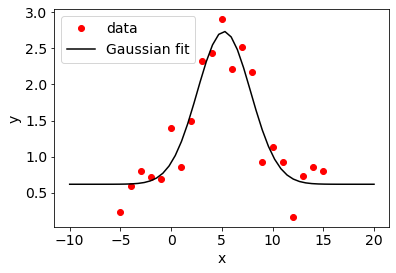

In [8]:
xline = np.array(np.linspace(-10,20,50))   # create array (50 points) to plot a smooth fitted line.
yline = f_G(xline,*popt)                   # calculate fitted line.

plt.plot(x, y, 'ro', label="data")                    # plot data as red circles.
plt.plot(xline, yline, 'k', label="Gaussian fit")   # plot black line for fit.
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('Gaussian_fit1.eps', format='eps')   # save figure to current folder (place before plt.show()).
plt.savefig('Gaussian_fit1.png', format='png') 
plt.show()

Note how the uncertainties in the fit parameters are reasonably large as the data is noisy and we have few points in the wings. Also, the uncertainty in the peak centre, $x_0$, is the smallest, so the centre of the peak can be found with higher precission than the peak amplitude, width or offset.

In [9]:
# Print relative uncertainties (%) of parameter estimates (to 1 decimal place):
[print("Error in",param_names[i],"is {0:0.1f}".format(abs(100*err[i]/popt[i])),"%") for i in range(len(popt))];

Error in A is 18.6 %
Error in B is 9.0 %
Error in x0 is 4.8 %
Error in std is 12.1 %


Let's try and fit again **without providing initial guesses for the fit parameters**, as param_guesses is an optional parameter of the **curve_fit** function. 

The algorithm seems to converge but to an inappropriate solution, as seen below (with very large uncertainties too). The same might happen when providing incorrect initial parameter guesses. 

Hence, **providing good initial guesses and testing different sets of parameter guesses** (together with **plotting**) is the best approach for performing non-linear least-squares regression computationally.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


A  = 1.52 ± 0.22
B  = -1.11 ± 0.60
x0  = -4.64 ± 5.06
std  = 2.88 ± 3.91


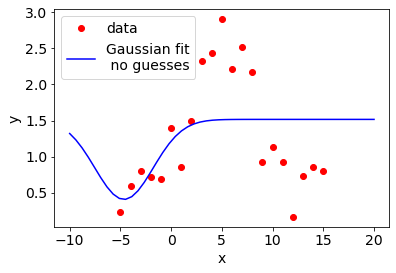

In [10]:
popt, pcov = curve_fit(f_G, x, y) # fit function
err = np.sqrt(np.diag(pcov))       # get errors of fit parameters

# Print fit parameters with their errors (to 2 decimal places):
[print(param_names[i]," = {0:0.2f} \xb1 {1:0.2f}".format(popt[i],err[i])) for i in range(len(popt))];

yline = f_G(xline,*popt)                   # calculate fitted line.
plt.plot(x, y, 'ro', label="data")                    # plot data as red circles.
plt.plot(xline, yline, 'b', label="Gaussian fit\n no guesses")   # plot black line for fit.
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('Gaussian_fit1_no_guesses.eps', format='eps')   # save figure to current folder (place before plt.show()).
plt.savefig('Gaussian_fit1_no_guesses.png', format='png') 
plt.show()

There are **some cases** in which **data is very well defined** (e.g. low noise, many data points or sufficient data in all relevant ranges), for which the **method converges** (i.e., best-fit parameters are found) **even when no initial guesses are provided**, or when very bad initial guesses are provided. However, in general, this might not be the case in with non-linear regression. 

The example below contains data for which the result is the same fitting with or without initial parameter guesses. The data has **low noise, many points and enough points in the Gaussian wings**. As a result, the uncertainties in the fit parameters are lower.

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


A  = 0.501 ± 0.001
B  = 0.137 ± 0.003
x0  = 4.968 ± 0.075
std  = -2.916 ± 0.087


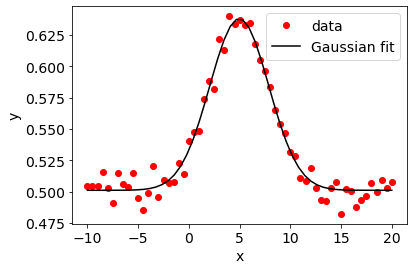

Error in A is 0.3 %
Error in B is 2.3 %
Error in x0 is 1.5 %
Error in std is 3.0 %


In [11]:
# Data with points every 0.5 units of x, Gaussian noise, mu = 0, sigma = 0.01, reasonable wings: 
x = np.arange(-10,20.5,0.5) 
y = np.array([0.50463082, 0.50450661, 0.50436517, 0.51570185, 0.50317244,
       0.4914121 , 0.51476531, 0.50586402, 0.50367952, 0.51452106,
       0.49516311, 0.48579575, 0.49901522, 0.5207693 , 0.49572187,
       0.50936232, 0.50684672, 0.50759447, 0.52283767, 0.51446051,
       0.54021517, 0.54751799, 0.54873421, 0.57365924, 0.58825053,
       0.58173036, 0.6219311 , 0.6130525 , 0.6397706 , 0.63343737,
       0.63677415, 0.63257878, 0.63432267, 0.61727674, 0.6048267 ,
       0.59635404, 0.5835583 , 0.56481739, 0.55357082, 0.54687153,
       0.5319738 , 0.52883206, 0.51128337, 0.50879273, 0.51879145,
       0.50275529, 0.4931236 , 0.49258447, 0.50318631, 0.50783796,
       0.48233033, 0.50211134, 0.50096876, 0.48785527, 0.4936122 ,
       0.4964337 , 0.50717807, 0.49959309, 0.50905166, 0.5030885 ,
       0.50808295])

popt, pcov = curve_fit(f_G, x, y) # fit function
err = np.sqrt(np.diag(pcov))       # get errors of fit parameters

# Print fit parameters with their errors (to 3 decimal places):
[print(param_names[i]," = {0:0.3f} \xb1 {1:0.3f}".format(popt[i],err[i])) for i in range(len(popt))];

yline2 = f_G(xline,*popt)                   # calculate fitted line.
plt.plot(x, y, 'ro', label="data")                    # plot data as red circles.
plt.plot(xline, yline2, 'k', label="Gaussian fit")   # plot black line for fit.
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('Gaussian_fit_more_wings.eps', format='eps')   # save figure to current folder (place before plt.show()).
plt.savefig('Gaussian_fit_more_wings.png', format='png')
plt.show()

# Print relative uncertainties (%) of parameter estimates (to 1 decimal place):
[print("Error in",param_names[i],"is {0:0.1f}".format(abs(100*err[i]/popt[i])),"%") for i in range(len(popt))];

**Importance of wings:**
Note how if the data we want to fit to a Gaussian does not have enough points in the wings (data points far enough from the centre), it is very hard to fit to a Gaussian. Therefore, it is important to have enough information in the wings **for an accurate Gaussian fit**.

Below is an **example** where **not enough data in the wings** is provided. In this case, the fit with no parameter guesses fails. The fit providing initial guesses succeeds but results in large uncertainties for the estimated parameters, with a relative error of ~ 90% for the offset (background level) and errors of >30% in the amplitude and standard deviation of the Gaussian. 

A  = 1.99 ± 0.15
B  = -1.08 ± 0.49
x0  = 0.05 ± 1.93
std  = 1.27 ± 1.42


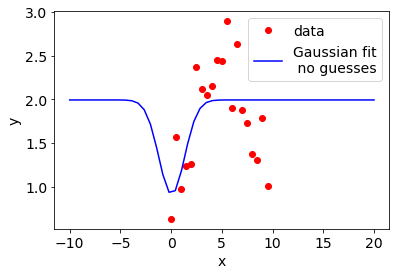

In [12]:
# Data with points every 0.5 units of x, 0.5 amplitude uniform noise and no wings:
x = np.arange(-0,10,0.5)
y = np.array([0.63487391, 1.57546606, 0.97275459, 1.23433476, 1.26312015,
       2.37027199, 2.12420384, 2.04808198, 2.14929339, 2.4523135 ,
       2.43872933, 2.89410688, 1.90765045, 2.63772718, 1.88392976,
       1.72563002, 1.3776031 , 1.30888177, 1.79335902, 1.0092242])

popt, pcov = curve_fit(f_G, x, y)  # fit function, no initial guesses given
err = np.sqrt(np.diag(pcov))       # get errors of fit parameters

# Print fit parameters with their errors (to 2 decimal places):
[print(param_names[i]," = {0:0.2f} \xb1 {1:0.2f}".format(popt[i],err[i])) for i in range(len(popt))];

yline2 = f_G(xline,*popt)                   # calculate fitted line.
plt.plot(x, y, 'ro', label="data")                    # plot data as red circles.
plt.plot(xline, yline2, 'b', label="Gaussian fit\n no guesses")   # plot black line for fit.
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('y')
plt.show()

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


A  = 0.71 ± 0.64
B  = 1.78 ± 0.59
x0  = 5.04 ± 0.24
std  = 2.55 ± 0.93


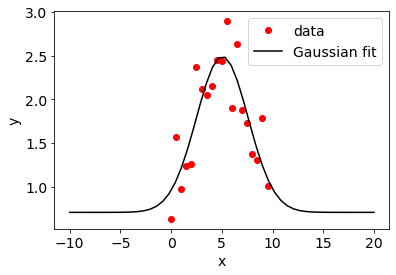

Error in A is 90.2 %
Error in B is 33.0 %
Error in x0 is 4.8 %
Error in std is 36.3 %


In [13]:
# Initial guesses for fit parameters:
param_guesses = [0.5, 1.8, 5, 3]   

popt, pcov = curve_fit(f_G, x, y, param_guesses)  # fit function
err = np.sqrt(np.diag(pcov))       # get errors of fit parameters

# Print fit parameters with their errors (to 2 decimal places):
[print(param_names[i]," = {0:0.2f} \xb1 {1:0.2f}".format(popt[i],err[i])) for i in range(len(popt))];

yline2 = f_G(xline,*popt)                   # calculate fitted line.
plt.plot(x, y, 'ro', label="data")                    # plot data as red circles.
plt.plot(xline, yline2, 'k', label="Gaussian fit")   # plot black line for fit.
plt.legend(loc="best")
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('Gaussian_fit_less_wings.eps', format='eps')   # save figure to current folder (place before plt.show()).
plt.savefig('Gaussian_fit_less_wings.png', format='png')
plt.show()

# Print relative uncertainties (%) of parameter estimates (to 1 decimal place):
[print("Error in",param_names[i],"is {0:0.1f}".format(abs(100*err[i]/popt[i])),"%") for i in range(len(popt))];

You will see more examples of non-linear least-squares regression in session 4 of the Python computing module in term 2.

## 2. Weighted fit to an exponential function:

In this case, we perform a weighted fit using the different error bars of the data points.

In [14]:
## Generate data that follows an exponential function, to fit it. Data with random noise and with a background level.
#t = np.arange(0,15,0.5)                      # x values  
#def f_exp(t, A, B, tau):                     # define exponential function.
#    return A + B * np.exp(-t/tau)
#offset = 0.1                                 # define offset (background level)
#x0 = f_exp(t,offset,1,2)                     # y values, Gaussian, before noise is added.
## Generate only positive values (including random noise): 
#x = []       # initialise empty arrays
#noise = []
#for i in range(len(x0)):
#    s = 0.3*(x0[i])*np.random.uniform(-1, 1)
#    while x0[i]+s < 0:   # keep trying til value+noise is positive
#        s = 0.3*(x0[i])*np.random.uniform(-1, 1)
#    x.append(x0[i]+s)
#    noise.append(s)                              
#plt.plot(t, x0, '-')                         # plot underlying equation.                     
#plt.errorbar(t, x, yerr = 1.2*np.array(noise), fmt="ro", linewidth=1, capsize=3, label="data")
#plt.show()
#np.round(x,3)
#abs(np.round(noise,3))

The data to fit is:

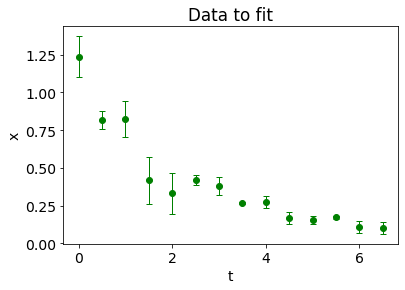

In [15]:
# Data with points every 0.5 units of t: 
t = np.arange(0,7,0.5) 
x = np.array([1.236, 0.819, 0.825, 0.417, 0.333, 0.418, 0.382, 0.266, 0.273,
       0.168, 0.154, 0.172, 0.11 , 0.101])

# Vertical error bars in absolute value:
error_bar = np.array([0.136, 0.059, 0.118, 0.155, 0.135, 0.032, 0.059, 0.008, 0.038,
       0.037, 0.028, 0.008, 0.039, 0.038])

# Plot of data:
#plt.plot(t, x, 'ro')
plt.errorbar(t, x, yerr = error_bar, fmt="go", linewidth=1, capsize=3, label="data")
plt.xlabel('t')
plt.ylabel('x')
plt.title('Data to fit');
plt.savefig('exp_data1.eps', format='eps')   # save figure to current folder (place before plt.show()).
plt.savefig('exp_data1.png', format='png')

Note how the data is not very clearly exponential as we have few data points at high values of t, which are the points that help define the exponential behaviour.

We define the following exponential function to fit:

$$ x(t) = A + B \exp \left( - \frac{t}{\tau} \right),$$

where $t$ is the independent variable, $A$ is the offset, $B$ is the value at $t=0$ and $\tau$ is the time constant of the exponential.

In [16]:
def f_exp(t, A, B, tau):   
    '''Exponential function. 
    t: independent variable. 
    A: offset. 
    B: value at t=0.
    tau: time constant.'''
    return A + B * np.exp(-t/tau)

Perform weighted non-linear least-squares fit:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


A  = 0.11 ± 0.02
B  = 1.00 ± 0.07
tau  = 1.94 ± 0.18


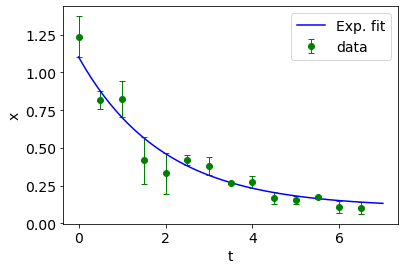

Error in A is 17.7 %
Error in B is 6.8 %
Error in tau is 9.2 %


In [17]:
popt, pcov = curve_fit(f_exp, t, x, sigma=error_bar, absolute_sigma=True) 
err = np.sqrt(np.diag(pcov))     # get errors of fit parameters

# Print fit parameters with their errors (to 2 decimal places):
param_names = ["A", "B", "tau"]
[print(param_names[i]," = {0:0.2f} \xb1 {1:0.2f}".format(popt[i],err[i])) for i in range(len(popt))];

tline = np.linspace(0,7,50) 
xline = f_exp(tline,*popt)       # calculate fitted line.
plt.errorbar(t, x, yerr = error_bar, fmt="go", linewidth=1, capsize=3, label="data")  # plot data.                               # plot data as red circles.
plt.plot(tline, xline, 'b', label="Exp. fit")   # plot black line for fit.
plt.legend(loc="best")
plt.xlabel('t')
plt.ylabel('x')
plt.savefig('exp_fit1.eps', format='eps')   # save figure to current folder (place before plt.show()).
plt.savefig('exp_fit1.png', format='png') 
plt.show()

# Print relative uncertainties (%) of parameter estimates (to 1 decimal place):
[print("Error in",param_names[i],"is {0:0.1f}".format(abs(100*err[i]/popt[i])),"%") for i in range(len(popt))];

Data with more values that define the asymptotic behaviour at large $t$:

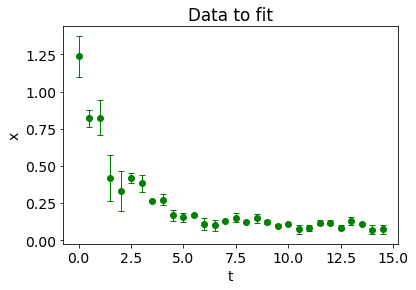

In [18]:
# Data with points every 0.5 units of t, going to higher t: 
t = np.arange(0,15,0.5) 
x = np.array([1.236, 0.819, 0.825, 0.417, 0.333, 0.418, 0.382, 0.266, 0.273,
       0.168, 0.154, 0.172, 0.11 , 0.101, 0.133, 0.153, 0.124, 0.147,
       0.124, 0.098, 0.11 , 0.074, 0.084, 0.119, 0.119, 0.085, 0.128,
       0.107, 0.072, 0.073])

# Vertical error bars in absolute value:
error_bar = np.array([0.136, 0.059, 0.118, 0.155, 0.135, 0.032, 0.059, 0.008, 0.038,
       0.037, 0.028, 0.008, 0.039, 0.038, 0.002, 0.03 , 0.006, 0.033,
       0.013, 0.011, 0.004, 0.031, 0.02 , 0.016, 0.016, 0.017, 0.026,
       0.006, 0.029, 0.028])

# Plot of data:
plt.errorbar(t, x, yerr = error_bar, fmt="go", linewidth=1, capsize=3, label="data")
plt.xlabel('t')
plt.ylabel('x')
plt.title('Data to fit');
plt.savefig('exp_data2.eps', format='eps')   # save figure to current folder (place before plt.show()).
plt.savefig('exp_data2.png', format='png')

Performing the weighted non-linear least-squares fit, in this case, we don't need initial guesses for parameters to obtain the result. The result obtained is the same when we provide reasonable initial guesses [0.1,1,2], for instance. Also, the uncertainties in the fit parameters are reduced:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


A  = 0.104 ± 0.003
B  = 0.982 ± 0.061
tau  = 1.983 ± 0.085


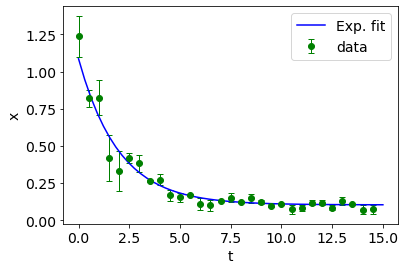

Error in A is 2.9 %
Error in B is 6.2 %
Error in tau is 4.3 %


In [19]:
popt, pcov = curve_fit(f_exp, t, x, sigma=error_bar, absolute_sigma=True) 
err = np.sqrt(np.diag(pcov))     # get errors of fit parameters

# Print fit parameters with their errors (to 2 decimal places):
[print(param_names[i]," = {0:0.3f} \xb1 {1:0.3f}".format(popt[i],err[i])) for i in range(len(popt))];

tline = np.linspace(0,15,50) 
xline = f_exp(tline,*popt)       # calculate fitted line.
plt.errorbar(t, x, yerr = error_bar, fmt="go", linewidth=1, capsize=3, label="data")  # plot data.                               # plot data as red circles.
plt.plot(tline, xline, 'b', label="Exp. fit")   # plot black line for fit.
plt.legend(loc="best")
plt.xlabel('t')
plt.ylabel('x')
plt.savefig('exp_fit2.eps', format='eps')   # save figure to current folder (place before plt.show()).
plt.savefig('exp_fit2.png', format='png') 
plt.show()

# Print relative uncertainties (%) of parameter estimates (to 1 decimal place):
[print("Error in",param_names[i],"is {0:0.1f}".format(abs(100*err[i]/popt[i])),"%") for i in range(len(popt))];

# 3. Linearising a non-linear regression fit:

It is sometimes possible to convert a non-linear regression problem into a linear regression problem.

In the example of the exponential data, when there is no offset ($A \approx 0$), or when there is a known offset, the functional dependence is given by:
$$ x(t) = B \exp(-\frac{t}{\tau}),$$
so that we can write, equivalently:
$$\ln(x) = \ln(B)-\frac{t}{\tau}.$$

The latter expression corresponds to a straight-line fit with new dependent variable $x'=\ln(x)$, with independent variable $t$, with intercept $c = \ln(B)$ and with slope $m = -\frac{1}{\tau}$. In this way, we can re-write the previous equation as:

$$ x' = c + m t ,$$

which is clearly linear in the new fit parameters $c$ and $m$. 
In this way, one can perform a linear-regression fit that we know is guaranteed to find the best least-squares parameter estimations. 

The uncertainties in the original fit parameters that one wants to find, $\Delta B$ and $\Delta \tau$, need to be calculated from the uncertainties of the new fit parameters $\Delta m$ and $\Delta c$, using error propagation.

The uncertainties in the original fit parameters, $B = \exp(c)$ and $\tau = -\frac{1}{m}$ are:

$$\Delta B = B \Delta c$$  

and 

$$\Delta \tau = \frac{\Delta m}{m} \tau .$$ 

When the fit is a weighted fit, the corresponding error bars need to be adjusted applying error propagation. In this example, if we had known vertical error bars $\Delta x_i$, the new error bars for the new dependent variable $x'=\ln(x)$ would be calculated as:

$$\Delta x'_i = \frac{\Delta x_i}{x_i}.$$

Below, the results for the linearised fit (linear regression) and for the exponential fit (non-linear regression) are very similar, and with very similar uncertainties.

In [20]:
# # Generate data that follows an exponential function, to fit it. Data with random noise and no offset.
# t = np.arange(0,15,0.5)                      # x values  
# offset = 0                                 # define offset (background level)
# x0 = f_exp(t,offset,1,2)                     # y values, Gaussian, before noise is added.
# # Generate only positive values (including random noise): 
# x = []       # initialise empty arrays
# noise = []
# for i in range(len(x0)):
#     s = 0.3*(x0[i])*np.random.uniform(-1, 1)
#     while x0[i]+s < 0:   # keep trying til value+noise is positive
#         s = 0.3*(x0[i])*np.random.uniform(-1, 1)
#     x.append(x0[i]+s)
#     noise.append(s)                              
# plt.plot(t, x0, '-')                         # plot underlying equation.                     
# plt.errorbar(t, x, yerr = 1.2*np.array(noise), fmt="ro", linewidth=1, capsize=3, label="data")
# plt.show()
# np.round(x,5)
# #abs(np.round(noise,5))

In [21]:
#abs(np.round(noise,6))

In [22]:
# Exponential data with no offset: 
t = np.arange(0,15,0.5) 
x = np.array([0.906, 0.913, 0.498, 0.429, 0.462, 0.271, 0.186, 0.223, 0.166,
       0.076, 0.101, 0.056, 0.061, 0.033, 0.03 , 0.026, 0.018, 0.017,
       0.011, 0.009, 0.006, 0.007, 0.003, 0.002, 0.002, 0.002, 0.002,
       0.001, 0.001, 0.001])

# Vertical error bars in absolute value:
error_bar = np.array([9.4070e-02, 1.3411e-01, 1.0884e-01, 4.3040e-02, 9.4420e-02,
       1.5760e-02, 3.6950e-02, 4.8860e-02, 3.0950e-02, 2.9080e-02,
       1.9150e-02, 8.2300e-03, 1.1460e-02, 5.4000e-03, 1.8000e-04,
       2.1100e-03, 9.0000e-05, 3.1500e-03, 5.5000e-04, 1.1000e-04,
       9.4000e-04, 1.3600e-03, 8.0000e-04, 8.1000e-04, 0.0001e+00,
       2.0000e-05, 9.0000e-05, 5.0000e-05, 6.0000e-05, 1.4000e-04])

### The non-linear exponential fit results are:

In [23]:
# Define a new exponential function with no offset:
def f_exp2(t, B, tau):   
    '''Exponential function. 
    t: independent variable. 
    B: value at t=0.
    tau: time constant.'''
    return B * np.exp(-t/tau)

B  = 0.94 ± 0.01
tau  = 2.03 ± 0.01


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


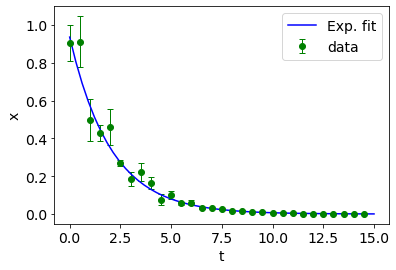

Error in B is 1.6 %
Error in tau is 0.4 %


In [24]:
popt, pcov = curve_fit(f_exp2, t, x, [1, 2], sigma=error_bar, absolute_sigma=True) 
err = np.sqrt(np.diag(pcov))     # get errors of fit parameters

# Print fit parameters with their errors (to 2 decimal places):
param_names2 = ["B", "tau"]
[print(param_names2[i]," = {0:0.2f} \xb1 {1:0.2f}".format(popt[i],err[i])) for i in range(len(popt))];

tline = np.linspace(0,15,50) 
xline = f_exp2(tline,*popt)       # calculate fitted line.
plt.errorbar(t, x, yerr = error_bar, fmt="go", linewidth=1, capsize=3, label="data")  # plot data.                               # plot data as red circles.
plt.plot(tline, xline, 'b', label="Exp. fit")   # plot black line for fit.
plt.legend(loc="best")
plt.xlabel('t')
plt.ylabel('x')
plt.savefig('exp_fit3.eps', format='eps')   # save figure to current folder (place before plt.show()).
plt.savefig('exp_fit3.png', format='png') 
plt.show()

# Print relative uncertainties (%) of parameter estimates (to 1 decimal place):
[print("Error in",param_names2[i],"is {0:0.1f}".format(abs(100*err[i]/popt[i])),"%") for i in range(len(popt))];

### And linearising the fit:

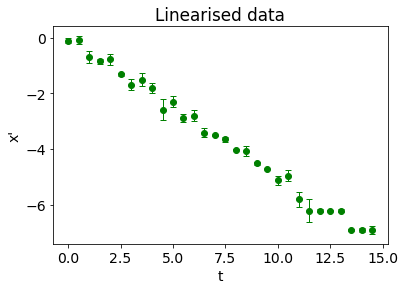

In [25]:
x_new = np.log(x)              # new dependent variable.
error_bar_new = abs(error_bar/x)    # new vertical error bars.

# Plot of linearised data to fit:
plt.errorbar(t, x_new, yerr = error_bar_new, fmt="go", linewidth=1, capsize=3, label="data")
plt.xlabel('t')
plt.ylabel("x'")
plt.title('Linearised data');

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


m  = -0.491 ± 0.002
c  = -0.076 ± 0.016


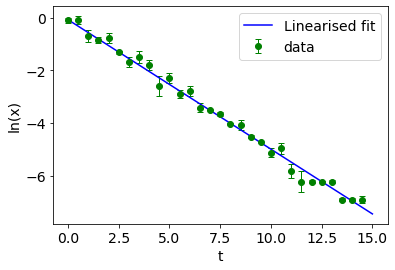

Error in m is 0.37 %
Error in c is 20.46 %


In [26]:
degree = 1
popt, pcov = np.polyfit(t,x_new,degree,w=1/error_bar_new,cov='unscaled')  # linear fit

err = np.sqrt(np.diag(pcov))                    # get errors of fit parameters

# Print fit parameters with their errors (to 2 decimal places):
param_names3 = ["m", "c"]
[print(param_names3[i]," = {0:0.3f} \xb1 {1:0.3f}".format(popt[i],err[i])) for i in range(len(popt))];

tline = np.linspace(0,15,50) 
xline = popt[0]*tline + popt[1]                 # calculate fitted line.
plt.errorbar(t, x_new, yerr = error_bar_new, fmt="go", linewidth=1, capsize=3, label="data")  # plot data.                               # plot data as red circles.
plt.plot(tline, xline, 'b', label="Linearised fit")   # plot black line for fit.
plt.legend(loc="best")
plt.xlabel('t')
plt.ylabel("ln(x)")
plt.savefig('exp_fit3_linearised.eps', format='eps')   # save figure to current folder (place before plt.show()).
plt.savefig('exp_fit3_linearised.png', format='png')
plt.show()

# Print relative uncertainties (%) of parameter estimates (to 1 decimal place):
[print("Error in",param_names3[i],"is {0:0.2f}".format(abs(100*err[i]/popt[i])),"%") for i in range(len(popt))];

And the results for the original fit parameters, $B$ and $\tau$, are:

In [27]:
c = popt[1]               # intercept of fit
m = popt[0]               # slope of fit
c_err = err[1]            # error in intercept
m_err = err[0]            # error in slope
p_B = np.exp(c)           # original fit parameter B
p_B_err = abs(p_B*c_err)       # error in B
p_tau = -1/m              # original fit parameter tau
p_tau_err = abs(p_tau*m_err/m) # error in tau

print("B = {0:0.2f} \xb1 {1:0.2f}".format(p_B,p_B_err))
print("tau = {0:0.2f} \xb1 {1:0.2f}".format(p_tau,p_tau_err))

B = 0.93 ± 0.01
tau = 2.04 ± 0.01


In [28]:
print("Relative error in B is {0:0.1f}".format(100*p_B_err/p_B),"%")
print("Relative error in tau is {0:0.1f}".format(100*p_tau_err/p_tau),"%")

Relative error in B is 1.6 %
Relative error in tau is 0.4 %



### There is not much difference between the linearised fit and the exponential fit either when having less data points at large x:

In [29]:
# Exponential data with no offset: 
t = np.arange(0,7,0.5) 
x = np.array([0.906, 0.913, 0.498, 0.429, 0.462, 0.271, 0.186, 0.223, 0.166,
       0.076, 0.101, 0.056, 0.061, 0.033])

# Vertical error bars in absolute value:
error_bar = np.array([9.4070e-02, 1.3411e-01, 1.0884e-01, 4.3040e-02, 9.4420e-02,
       1.5760e-02, 3.6950e-02, 4.8860e-02, 3.0950e-02, 2.9080e-02,
       1.9150e-02, 8.2300e-03, 1.1460e-02, 5.4000e-03])

B  = 0.94 ± 0.06
tau  = 2.01 ± 0.08


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


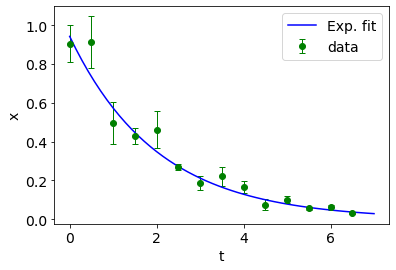

Error in B is 6.2 %
Error in tau is 3.9 %


In [30]:
popt, pcov = curve_fit(f_exp2, t, x, [1, 2], sigma=error_bar, absolute_sigma=True) 
err = np.sqrt(np.diag(pcov))     # get errors of fit parameters

# Print fit parameters with their errors (to 2 decimal places):
param_names2 = ["B", "tau"]
[print(param_names2[i]," = {0:0.2f} \xb1 {1:0.2f}".format(popt[i],err[i])) for i in range(len(popt))];

tline = np.linspace(0,7,50) 
xline = f_exp2(tline,*popt)       # calculate fitted line.
plt.errorbar(t, x, yerr = error_bar, fmt="go", linewidth=1, capsize=3, label="data")  # plot data.                               # plot data as red circles.
plt.plot(tline, xline, 'b', label="Exp. fit")   # plot black line for fit.
plt.legend(loc="best")
plt.xlabel('t')
plt.ylabel('x')
plt.savefig('exp_fit4_.eps', format='eps')   # save figure to current folder (place before plt.show()).
plt.savefig('exp_fit4_.png', format='png')
plt.show()

# Print relative uncertainties (%) of parameter estimates (to 1 decimal place):
[print("Error in",param_names2[i],"is {0:0.1f}".format(abs(100*err[i]/popt[i])),"%") for i in range(len(popt))];

And the linearised fit:

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


m  = -0.491 ± 0.020
c  = -0.052 ± 0.062


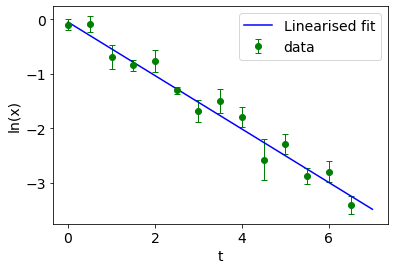

Error in m is 4.02 %
Error in c is 120.58 %


In [31]:
x_new = np.log(x)              # new dependent variable.
error_bar_new = error_bar/x    # new vertical error bars.

degree = 1
popt, pcov = np.polyfit(t,x_new,degree,w=1/error_bar_new,cov='unscaled')

err = np.sqrt(np.diag(pcov))                    # get errors of fit parameters

# Print fit parameters with their errors (to 2 decimal places):
param_names3 = ["m", "c"]
[print(param_names3[i]," = {0:0.3f} \xb1 {1:0.3f}".format(popt[i],err[i])) for i in range(len(popt))];

tline = np.linspace(0,7,50) 
xline = popt[0]*tline + popt[1]                 # calculate fitted line.
plt.errorbar(t, x_new, yerr = error_bar_new, fmt="go", linewidth=1, capsize=3, label="data")  # plot data.                               # plot data as red circles.
plt.plot(tline, xline, 'b', label="Linearised fit")   # plot black line for fit.
plt.legend(loc="best")
plt.xlabel('t')
plt.ylabel("ln(x)")
plt.savefig('exp_fit4_linearised.eps', format='eps')   # save figure to current folder (place before plt.show()).
plt.savefig('exp_fit4_linearised.png', format='png')
plt.show()

# Print relative uncertainties (%) of parameter estimates (to 1 decimal place):
[print("Error in",param_names3[i],"is {0:0.2f}".format(abs(100*err[i]/popt[i])),"%") for i in range(len(popt))];

In [32]:
c = popt[1]               # intercept of fit
m = popt[0]               # slope of fit
c_err = err[1]            # error in intercept
m_err = err[0]            # error in slope
p_B = np.exp(c)           # original fit parameter B
p_B_err = abs(p_B*c_err)  # error in B
p_tau = -1/m              # original fit parameter tau
p_tau_err = abs(p_tau*m_err/m) # error in tau

print("B = {0:0.2f} \xb1 {1:0.2f}".format(p_B,p_B_err))
print("tau = {0:0.2f} \xb1 {1:0.2f}".format(p_tau,p_tau_err))

print("Relative error in B is {0:0.1f}".format(100*p_B_err/p_B),"%")
print("Relative error in tau is {0:0.1f}".format(100*p_tau_err/p_tau),"%")

B = 0.95 ± 0.06
tau = 2.04 ± 0.08
Relative error in B is 6.2 %
Relative error in tau is 4.0 %
